<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has be

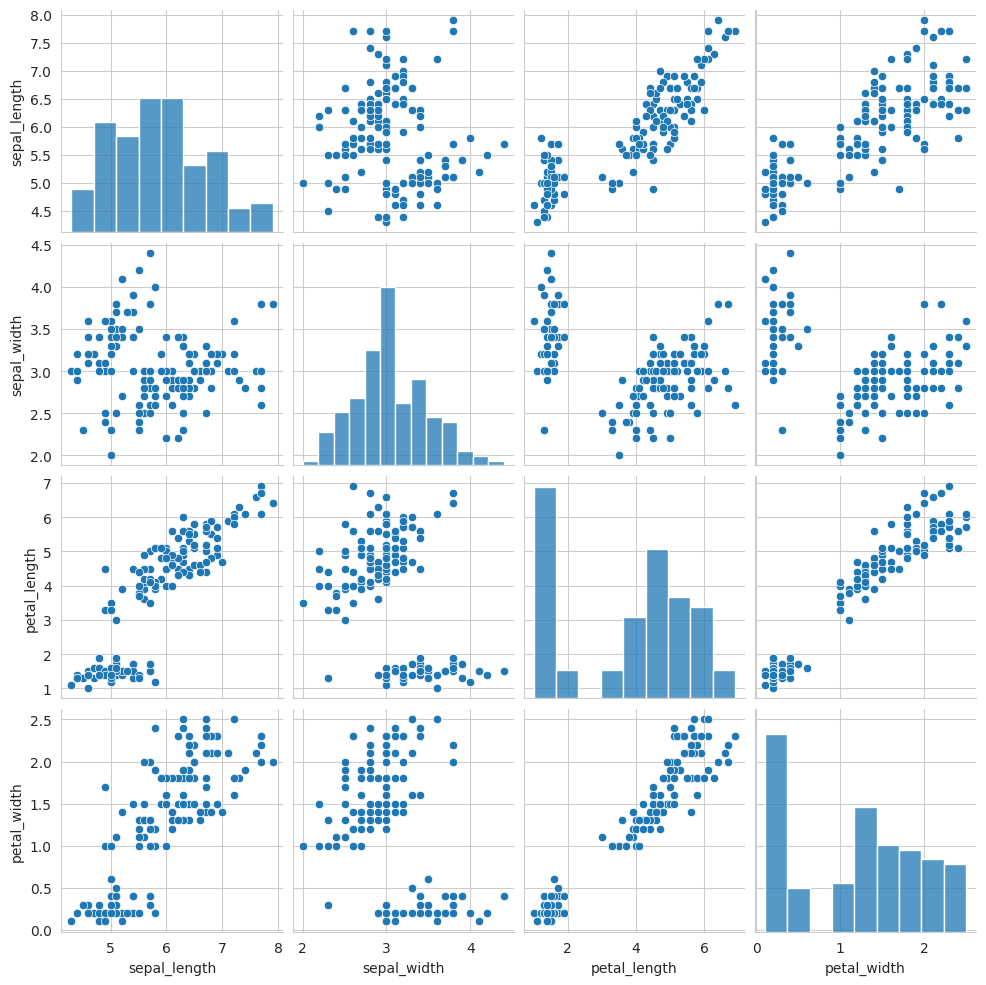

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** Observando os gráficos vemos que as variáveis estão divididas em 2 grupos, isso fica fácil de ver quando olhamos para o gráfico nos eixos petal_lenght e petal_width. Na parte sepal_lenght e sepal_width também vemos essa informação!

## 2\. Dados

### **2.1. Valores nulos**

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [5]:
# resposta da questão 2.1
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### **2.2. Variáveis numéricas**

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
# resposta da questão 2.2
#Não há necessidade de escalar as variáveis numéricas!

### **2.3. Limpeza**

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [ ]:
# resposta da questão 2.3
#Não há necessidade de escalar as variáveis numéricas!

## 3\. Modelagem

### **3.1. Treino**

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [9]:

from sklearn.cluster import KMeans

In [10]:
# resposta da questão 3.1
wcss = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, n_init=10)
    model= model.fit(iris)
    wcss.append(model.inertia_)

In [11]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clustered_data = pd.concat([iris, clusters], axis=1)
clustered_data.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,8
2,4.7,3.2,1.3,0.2,8
3,4.6,3.1,1.5,0.2,8
4,5.0,3.6,1.4,0.2,1


### **3.2. Avaliação**

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

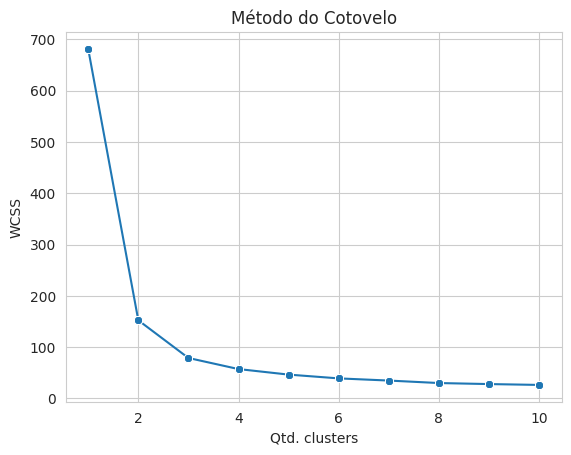

In [12]:
# resposta da questão 3.2
with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8",)
    grafico.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clusters')


In [19]:
# resposta da questão 3.3.a
# Vamos analisar aqui o modelo com 2 Clusters!

model = KMeans(n_clusters=2, n_init=10)
model = model.fit(iris)

In [20]:
clusters = model.labels_
clustered_data = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

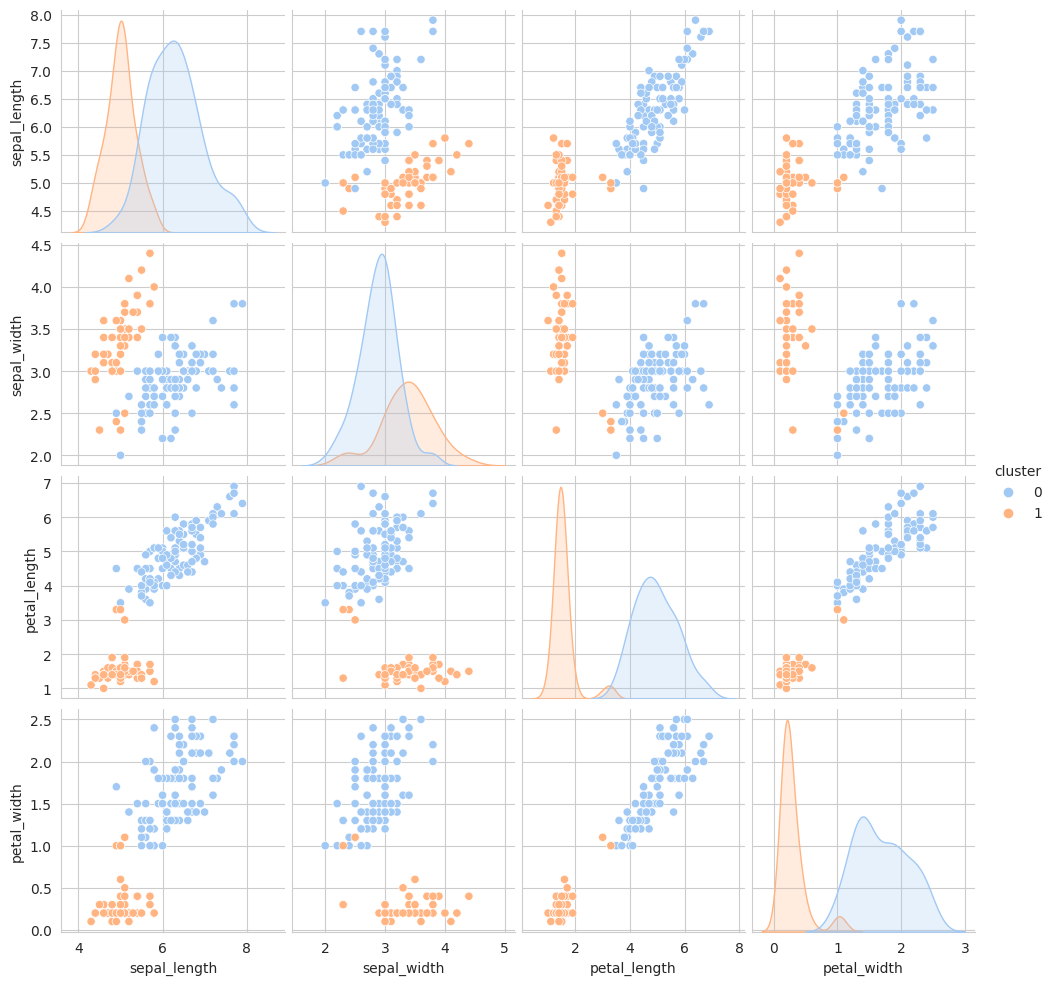

In [21]:
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

In [22]:
# Vamos analisar aqui o modelo com 3 Clusters!
model = KMeans(n_clusters=3, n_init=10)
model = model.fit(iris)

In [23]:
clusters = model.labels_
clustered_data = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

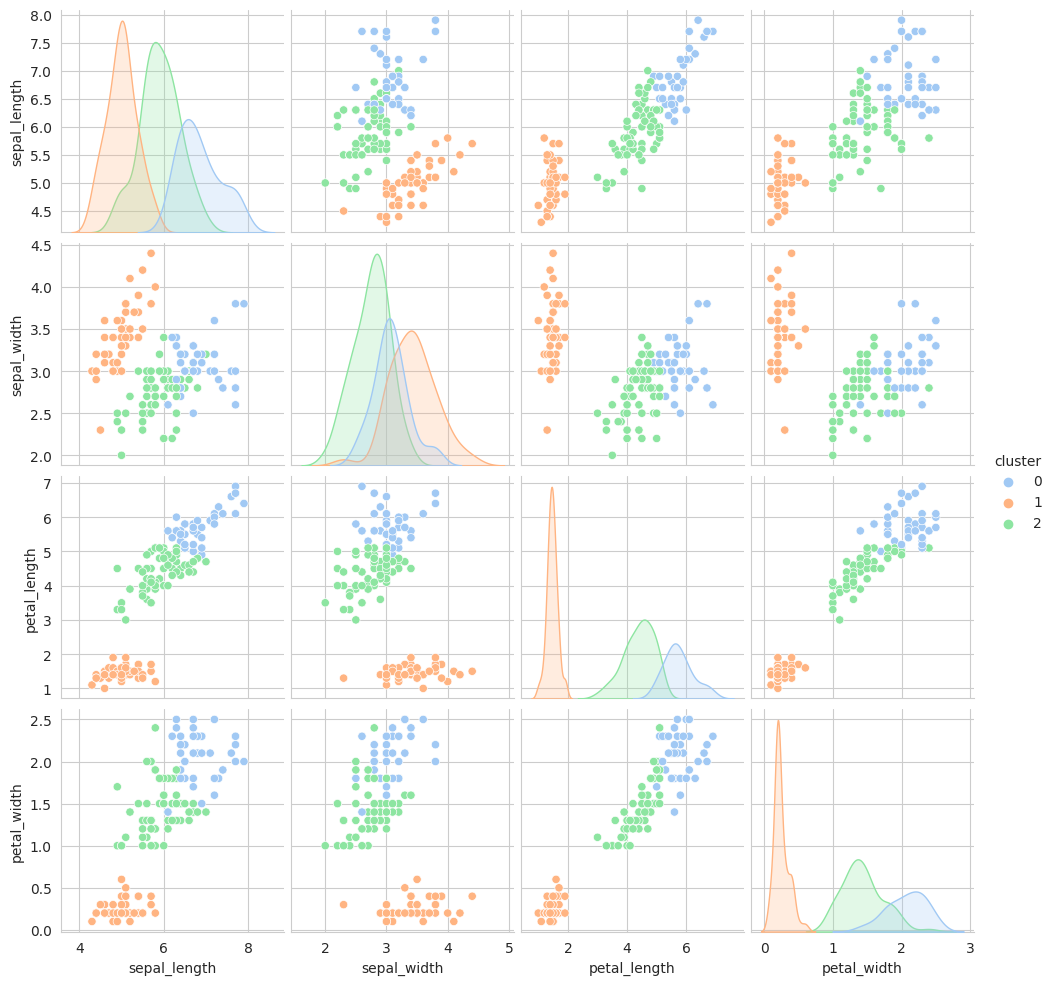

In [24]:
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

In [28]:
# Vamos analisar aqui o modelo com 4 Clusters!
model = KMeans(n_clusters=4, n_init=10)
model = model.fit(iris)

In [29]:
clusters = model.labels_
clustered_data = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

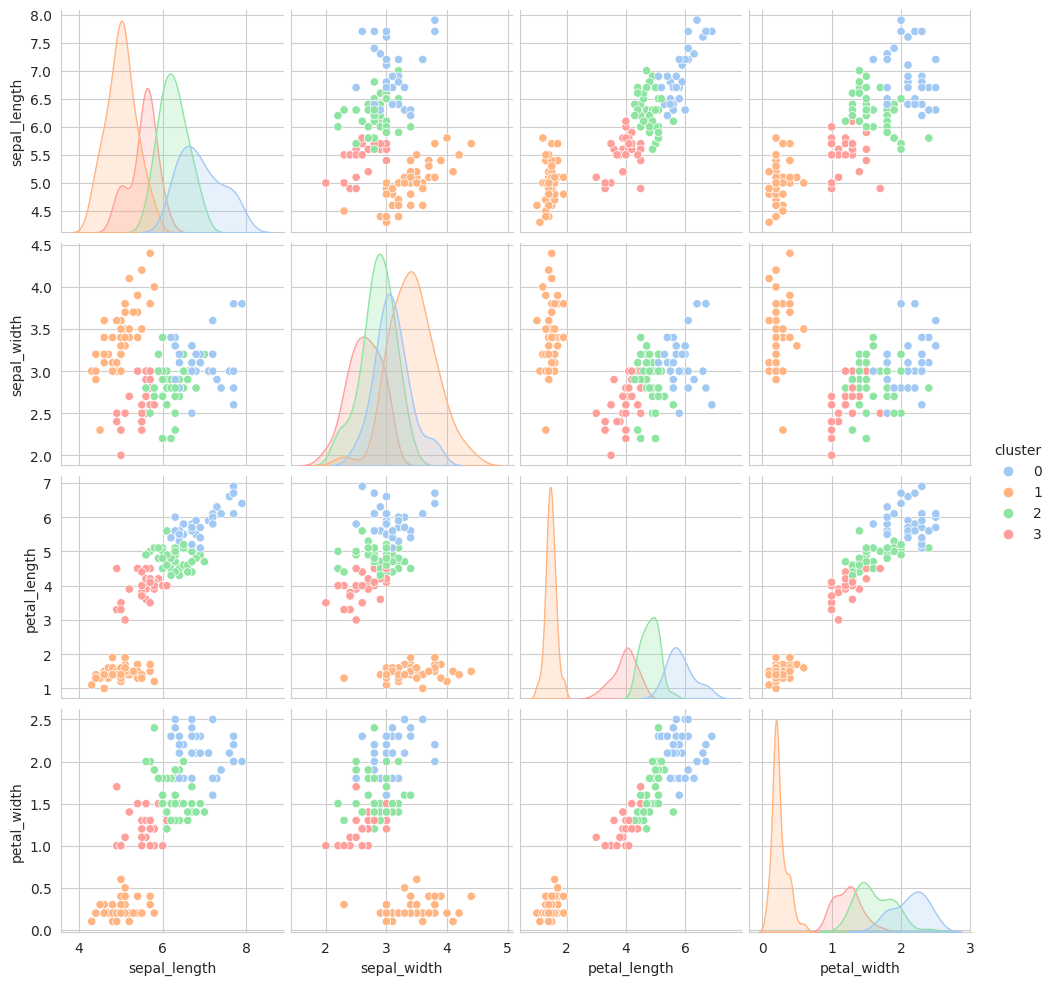

In [30]:
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

### **3.3. Visualização**

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [60]:
model = KMeans(n_clusters=3, n_init=10)
model = model.fit(iris)


In [61]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])


In [62]:
new_iris = pd.concat([iris, clusters], axis=1)
new_iris.head()



,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

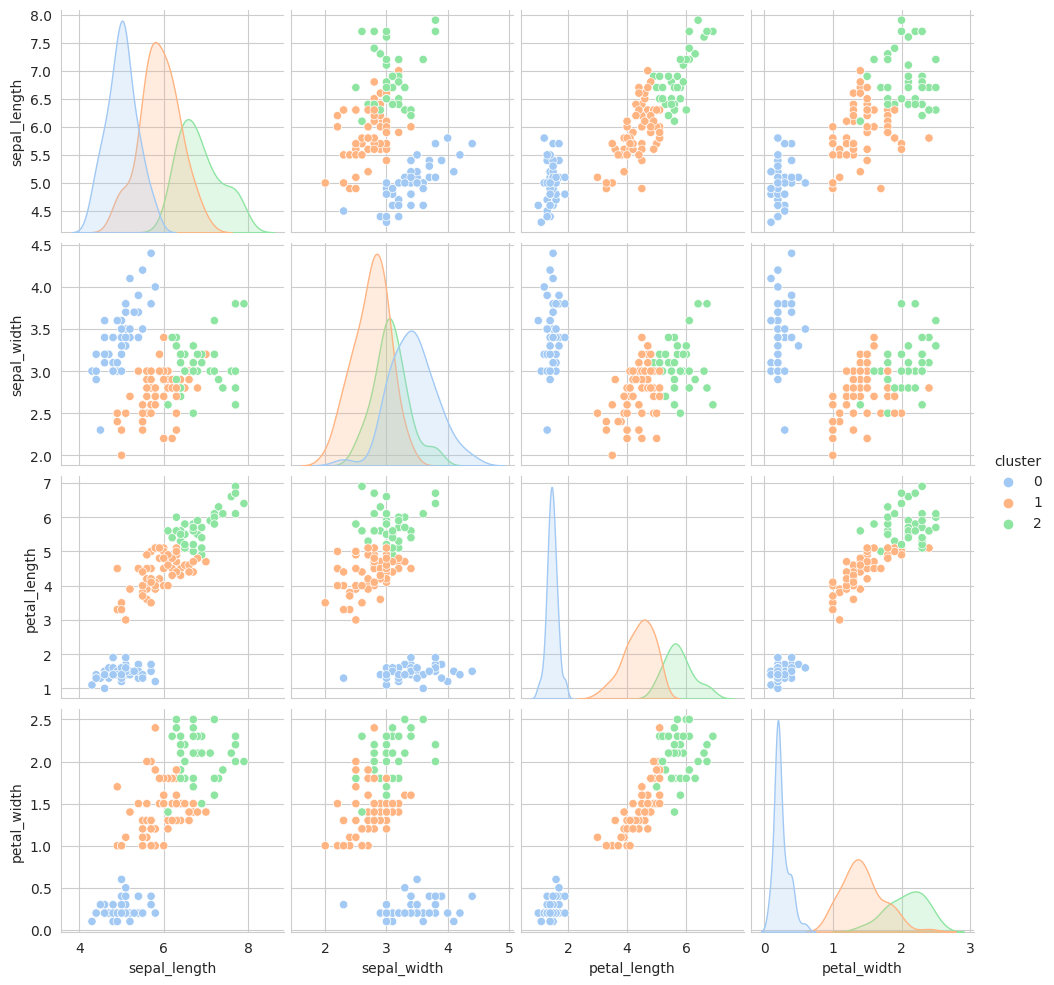

In [63]:
# resposta da questão 3.3.b
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=new_iris, hue='cluster', palette="pastel")

**Comentário:** Após a análise a melhor opção é usar 3 clusters pois os grupos ficam bem mais divididos! Até mesmo se olharmos os grupos 1 e 2 que tem algumas características semelhantes podemos ter uma boa distinção!

## 4\. Predição  

### **4.1. Nova flor**

Em qual cluster a flor abaixo seria alocada?

De acordo com a análise, Grupo 0!


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [64]:
# resposta da questão 4.1
data = [{'sepal_length': 5.1, 'sepal_width': 3.5, 'petal_length': 1.4, 'petal_width': 0.2}]

In [65]:
new_flower_df = pd.DataFrame(data)
print(new_flower_df)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2


In [66]:
new_flower_df = np.array(new_flower_df)
print(new_flower_df)

[[5.1 3.5 1.4 0.2]]


In [68]:
cluster = model.predict(new_flower_df.reshape(1, -1))
print(cluster)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


---